In [1]:
from data_analyzer import DataAnalyzer
from ipyfilechooser import FileChooser

fc = FileChooser('.', filter_pattern=['*.xlsx', '*.xls'], title = '<b>Please Select data file</b>')
display(fc)  # this has to be the last line in the cell, otherwise the dialog doesn't work

FileChooser(path='/Users/kaleighcarlone/Documents/HCI 584/EEG-Analysis-Program-HCI584-2', filename='', title='…

In [2]:
# Verify file path
print("Selected file:", fc.selected)
analyzer = DataAnalyzer(fc.selected)
analyzer.is_valid_file()  

Selected file: /Users/kaleighcarlone/Documents/HCI 584/EEG-Analysis-Program-HCI584-2/Analysis_EO_2022.10.17_13.00.34.xlsx
Everything checks out! You are clear to process the data!


True

In [3]:
# Calculate the CZ Theta/Beta ratio and provide interpretation based on its value
analyzer.calculate_cz_theta_beta_ratio()

CZ Theta/Beta Ratio: 0.1402605
Strong activation in both fast and slow frequencies - consistent with physical 
restlessness, sleep-onset insomnia, impulsivity and distractibility, tendency toward 
irritability and/or anxiety, sometimes allergies or asthma


Mean frequency plot saved to 'mean_frequency_plot.png'


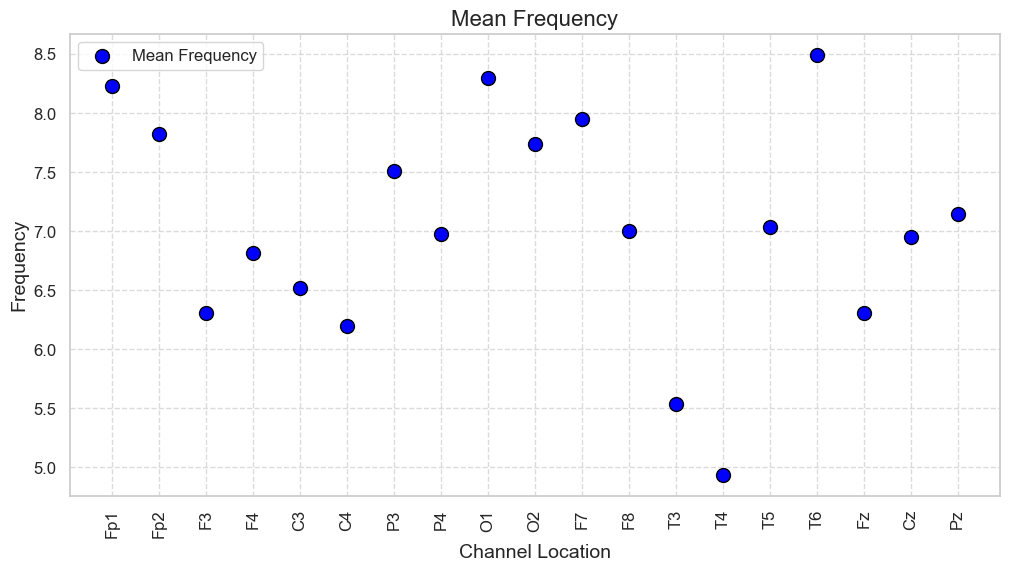

In [4]:
# Plot mean frequency and save to file
analyzer.plot_mean_frequency(output_file='mean_frequency_plot.png')

Extreme numbers plot saved to 'extreme_numbers_plot.pdf'


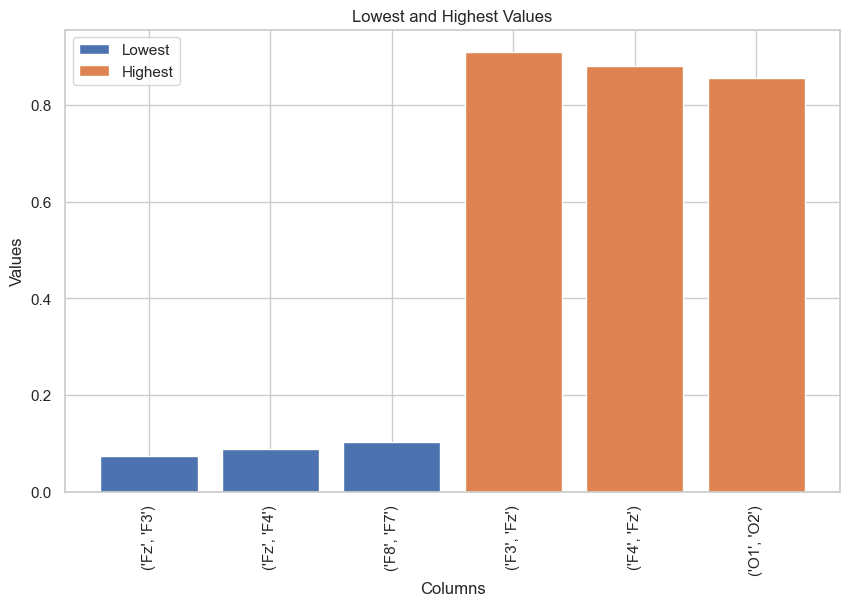

In [5]:
# Plot extreme numbers and save to file
analyzer.plot_extreme_numbers(output_file='extreme_numbers_plot.pdf')